# Pi Aprroximation Using Monte Carlo Simulation

## Introduction

This is a demonstration of using Monte Carlo simulation to apporixamte the value of pi. It aims to analyze the gain in accuracy as one increases the number of stimulation steps, as well as compute statistics about the process. 
To illustrate our approach, let us represent a square of size 1 in the chartesian plane and then draw a quarter of the circle with the centre at the origin and the radius equal to 1. Let n be the number of steps of our simulation. We randomnly generate n points within the square and check if they fall within the quarter of the circle or outside. Let p_inside be the number of points inside the quarter of the circle.
$\frac{p_{inside}}{n} = \frac{\pi}{4} \rightarrow pi = \frac{4 * p_{inside}}{n}$

To determine whether a point $P(x, y)$ is inside the quarter of the circle we check:
$x^2 + y^2 <= 1$.

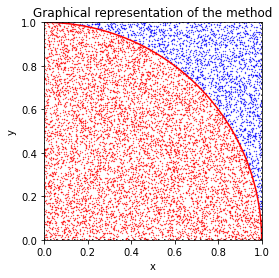

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#We use polar coordinates to draw the quarter of the circle

n_points = 100 

theta = np.linspace(0, np.pi/2, n_points)

xs = np.cos(theta)
ys = np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xs, ys, color = 'red')
plt.axhline(0, xmin = 0, xmax = 1, color = 'black', linestyle = (0, (1, 3)))
plt.axvline(0, ymin = 0, ymax = 1, color = 'black', linestyle = (0, (1, 3)))
plt.axhline(1, xmin = 0, xmax = 1, color = 'black', linestyle = (0, (1, 3)))
plt.axvline(1, ymin = 0, ymax = 1, color = 'black', linestyle = (0, (1, 3)))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.title('Graphical representation of the method')

#Let n = 10000 for now

n = 10000

xs = np.random.random(n)
ys = np.random.random(n)

plt.scatter(xs[xs ** 2 + ys **2 <= 1], ys[xs ** 2 + ys **2 <= 1], color = 'red', s = 0.1)
plt.scatter(xs[xs ** 2 + ys **2 > 1], ys[xs ** 2 + ys **2 > 1], color = 'blue', s = 0.1)

## Simulation

We now define the function mc_pi_simulation that takes in a number n (simulation steps) and returns the approximation of pi using the previously described method.

In [61]:
def mc_pi_simulation(n):
    xs = np.random.random(n)
    ys = np.random.random(n)
    p_inside = np.sum(xs ** 2 + ys **2 <= 1)
    return 4 * p_inside / n

We then use the previous function to compute n_max approxiamtions of pi and store them in an NumPy array.

In [66]:
#Let us define n_max as the maximum number of simulation steps
n_max = 100000

pi_values = np.zeros(n_max)

for i in range(1, n_max):
    pi_values[i] = mc_pi_simulation(i)

We plot the computed approximations on a logarithmic scale.

Text(0.5, 1.0, 'Approximations of pi as n becomes larger')

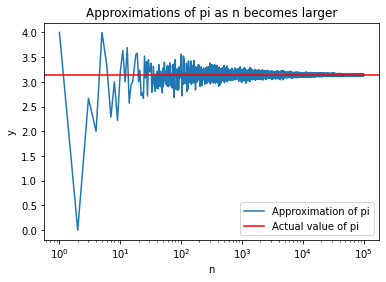

In [92]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(1, n_max), pi_values[1:], label = 'Approximation of pi')
plt.axhline(np.pi, xmin = 0, color = 'red', label = 'Actual value of pi')
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('n')
plt.ylabel('y')
plt.title('Approximations of pi as n becomes larger')

## Statistics

We also want to compute some statistics to understand the precision of our computation as the number of simulation steps increases.

In [74]:
mean = np.mean(pi_values)
sd = np.std(pi_values)

print(f'Mean value: {mean}')
print(f'Standard deviation: {sd}')

Mean value: 3.1415327838387515
Standard deviation: 0.021940763886956392


Text(0.5, 1.0, 'Behavior of the sample standard deviation relative to n')

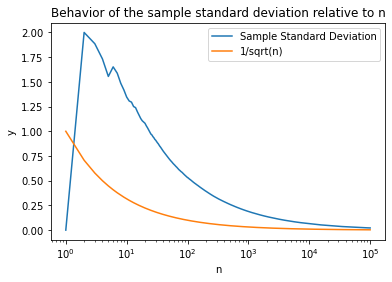

In [95]:
sds = np.zeros(n_max)
for i in range(1, n_max):
    sds[i] = np.std(pi_values[:i])
steps = np.arange(1, n_max)
sd_scale = 1 / np.sqrt(steps)
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(steps, sds[1:], label = 'Sample Standard Deviation')
plt.plot(steps, sd_scale, label = '1/sqrt(n)')
plt.xscale('log')
plt.legend(loc = 'upper right')
plt.xlabel('n')
plt.ylabel('y')
plt.title('Behavior of the sample standard deviation relative to n')

We observe that the standard deviation of our sample approaches $\frac{1}{\sqrt{n}}$ for large n.

## Conclusion

Using stochastic simulation we were able to approximate the value of pi starting from a basic geometrical setting. We then analyzied the accuracy of our computations with respect to the number of iterations. Finally, we computed some statistics to understand the generated data. In particular, we observed that the mean value of our simulated sample gets the first 4 digits of pi right and the standrad deviation decreases with sample size approaching $\frac{1}{\sqrt{n}}$. 